In [4]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv('data/MLE-Assignment.csv')
df = df.drop(columns=['hsi_id'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [8]:
df['vomitoxin_ppb'].value_counts()

vomitoxin_ppb
0.0       88
200.0     41
300.0     27
500.0     25
100.0     24
          ..
250.0      1
2300.0     1
6100.0     1
4000.0     1
9300.0     1
Name: count, Length: 128, dtype: int64

In [9]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=449)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 449 entries, 0 to vomitoxin_ppb
dtypes: float64(449)
memory usage: 1.7 MB


In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [12]:
df.isnull().sum().sum()

np.int64(0)

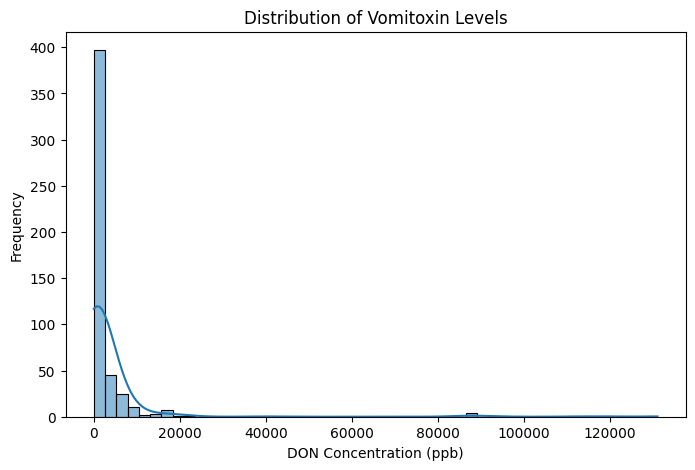

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['vomitoxin_ppb'], bins=50, kde=True)
plt.xlabel("DON Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Vomitoxin Levels")
plt.show()


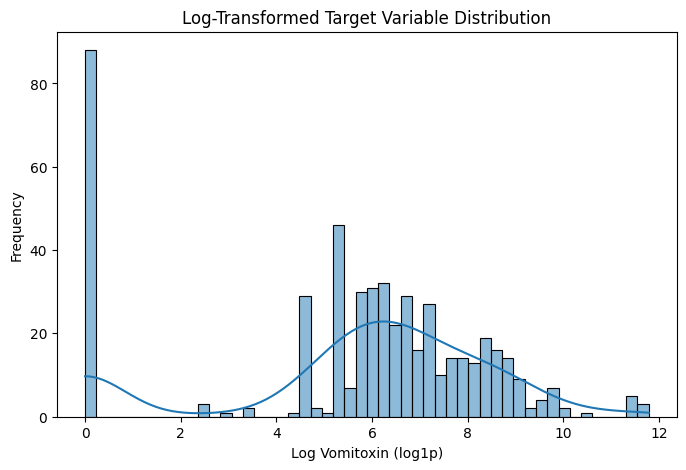

In [14]:
import numpy as np

df['log_vomitoxin'] = np.log1p(df['vomitoxin_ppb'])  
plt.figure(figsize=(8,5))
sns.histplot(df['log_vomitoxin'], bins=50, kde=True)
plt.xlabel("Log Vomitoxin (log1p)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Target Variable Distribution")
plt.show()


In [15]:
df['is_contaminated'] = (df['vomitoxin_ppb'] > 0).astype(int)

In [16]:
X = df.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])  
y_class = df['is_contaminated']  
y_reg = df[df['is_contaminated'] == 1]['log_vomitoxin']  

In [17]:
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [18]:
X_train_reg = X_train[y_class_train == 1]  
X_test_reg = X_test[y_class_test == 1]  

In [19]:
y_reg_train = df.loc[X_train_reg.index, 'log_vomitoxin']
y_reg_test = df.loc[X_test_reg.index, 'log_vomitoxin']

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_class_train)

print("Training Accuracy:", clf.score(X_train, y_class_train))
print("Test Accuracy:", clf.score(X_test, y_class_test))

Training Accuracy: 1.0
Test Accuracy: 0.85


In [20]:
importances = clf.feature_importances_
feature_names = X.columns
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
print(sorted_features[:10]) 

[('171', np.float64(0.006685772706636874)), ('13', np.float64(0.006259258247463384)), ('19', np.float64(0.006136083881548095)), ('440', np.float64(0.00576657475399874)), ('414', np.float64(0.005685184314809613)), ('244', np.float64(0.00558530640621367)), ('320', np.float64(0.0055802372889621)), ('5', np.float64(0.005542886751524753)), ('44', np.float64(0.005529755705734412)), ('284', np.float64(0.0054829741396828155))]


In [21]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_class_train)

print("Training Accuracy:", clf.score(X_train, y_class_train))
print("Test Accuracy:", clf.score(X_test, y_class_test))

Training Accuracy: 0.9575
Test Accuracy: 0.86


In [22]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
clf.fit(X_train, y_class_train)

print("Training Accuracy:", clf.score(X_train, y_class_train))
print("Test Accuracy:", clf.score(X_test, y_class_test))

Training Accuracy: 1.0
Test Accuracy: 0.83


In [23]:
clf = XGBClassifier(
    n_estimators=200,     
    max_depth=7,           
    learning_rate=0.05,    
    colsample_bytree=0.8,   
    subsample=0.8,         
    reg_lambda=10,         
    reg_alpha=5,           
    random_state=42
)
clf.fit(X_train, y_class_train)
print("Training Accuracy:", clf.score(X_train, y_class_train))
print("Test Accuracy:", clf.score(X_test, y_class_test))


Training Accuracy: 0.8975
Test Accuracy: 0.85


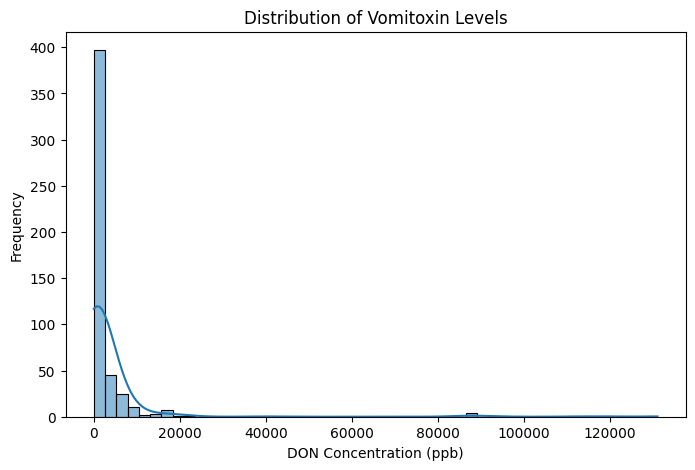

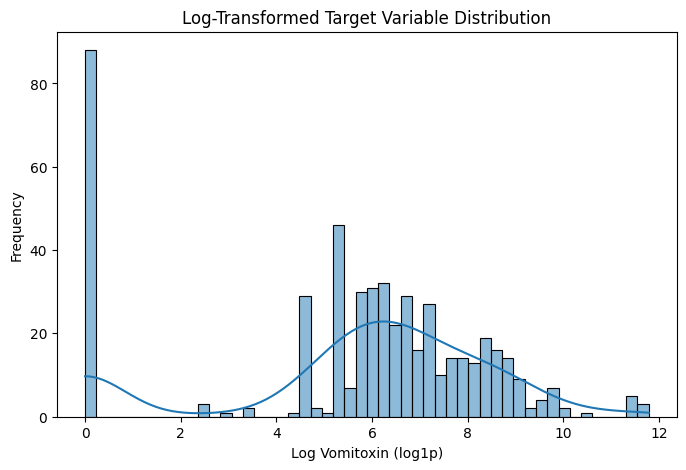

Training Accuracy: 0.9575
Test Accuracy: 0.86
XGBoost Training Accuracy: 1.0
XGBoost Test Accuracy: 0.83


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/MLE-Assignment.csv')

df = df.drop(columns=['hsi_id'])

plt.figure(figsize=(8,5))
sns.histplot(df['vomitoxin_ppb'], bins=50, kde=True)
plt.xlabel("DON Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Vomitoxin Levels")
plt.show()

df['log_vomitoxin'] = np.log1p(df['vomitoxin_ppb'])

plt.figure(figsize=(8,5))
sns.histplot(df['log_vomitoxin'], bins=50, kde=True)
plt.xlabel("Log Vomitoxin (log1p)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Target Variable Distribution")
plt.show()

df['is_contaminated'] = (df['vomitoxin_ppb'] > 0).astype(int)

X = df.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])
y_class = df['is_contaminated']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_class_train, y_class_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_class_train)

print("Training Accuracy:", clf.score(X_train, y_class_train))
print("Test Accuracy:", clf.score(X_test, y_class_test))

clf_xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
clf_xgb.fit(X_train, y_class_train)

print("XGBoost Training Accuracy:", clf_xgb.score(X_train, y_class_train))
print("XGBoost Test Accuracy:", clf_xgb.score(X_test, y_class_test))


In [25]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
df_contaminated = df[df['is_contaminated'] == 1]

In [27]:
X_reg = df_contaminated.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])
y_reg = df_contaminated['log_vomitoxin']

In [28]:
X_reg_scaled = scaler.transform(X_reg)  

In [29]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

In [30]:
reg_rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42)
reg_rf.fit(X_train_reg, y_train_reg)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                      random_state=42)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error


In [39]:
y_pred_rf = reg_rf.predict(X_test_reg)
rmse_rf = root_mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("Random Forest Regressor - RMSE:", rmse_rf)
print("Random Forest Regressor - R² Score:", r2_rf)

Random Forest Regressor - RMSE: 1.2346107178249692
Random Forest Regressor - R² Score: 0.3927410360596798


In [41]:
reg_xgb = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
reg_xgb.fit(X_train_reg, y_train_reg)

y_pred_xgb = reg_xgb.predict(X_test_reg)
rmse_xgb = root_mean_squared_error(y_test_reg, y_pred_xgb)
r2_xgb = r2_score(y_test_reg, y_pred_xgb)

print("XGBoost Regressor - RMSE:", rmse_xgb)
print("XGBoost Regressor - R² Score:", r2_xgb)

XGBoost Regressor - RMSE: 1.1997143262091068
XGBoost Regressor - R² Score: 0.42658435429695185


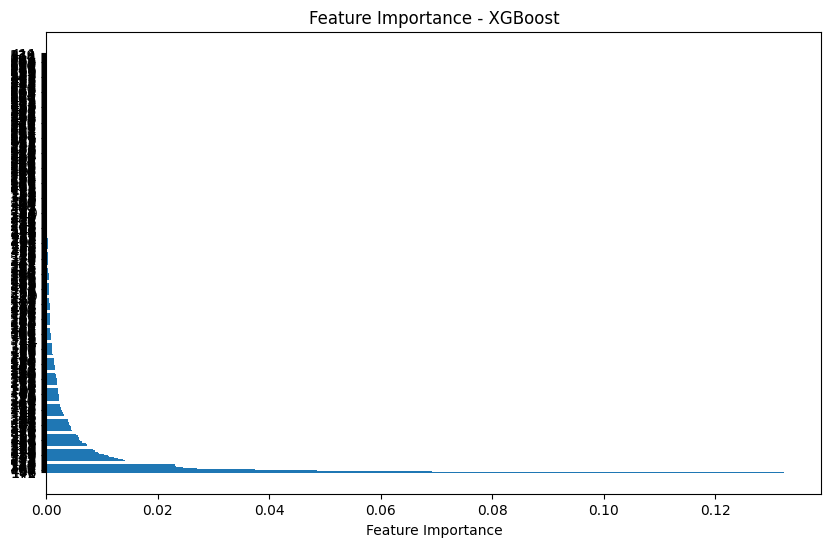

In [42]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = reg_xgb.feature_importances_
feature_names = X_reg.columns

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance - XGBoost")
plt.show()


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_reg, y_train_reg)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

In [117]:
from xgboost import XGBRegressor

best_params = grid_search.best_params_
final_xgb_reg = XGBRegressor(**best_params, random_state=42)
final_xgb_reg.fit(X_train_reg, y_train_reg)

y_reg_pred_final = final_xgb_reg.predict(X_test_reg)


In [118]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_reg, y_reg_pred_final))
mae = mean_absolute_error(y_test_reg, y_reg_pred_final)
r2 = r2_score(y_test_reg, y_reg_pred_final)

print(f"🔹 XGBoost Regression Model Evaluation 🔹")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


🔹 XGBoost Regression Model Evaluation 🔹
✅ RMSE: 1.1875
✅ MAE: 0.9349
✅ R² Score: 0.4382


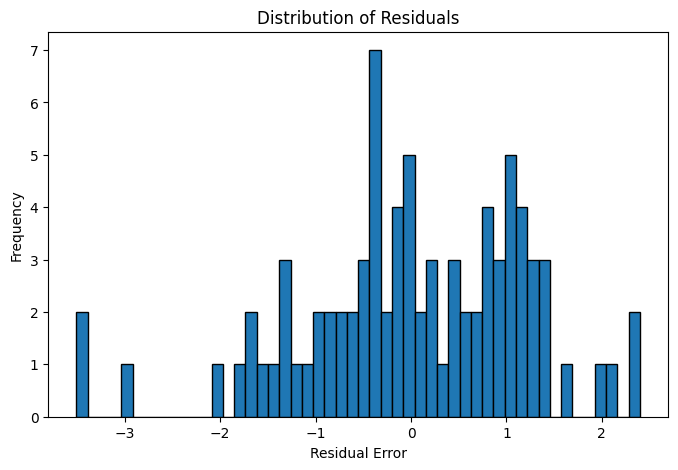

In [122]:
residuals = y_test_reg - y_reg_pred_final
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [126]:
df = pd.read_csv('dataset.csv')
df = df.drop(columns=['hsi_id'])
df['log_vomitoxin'] = np.log1p(df['vomitoxin_ppb'])
df['is_contaminated'] = (df['vomitoxin_ppb'] > 0).astype(int)

In [127]:
X = df.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])
y_class = df['is_contaminated']

In [132]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [133]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=50),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 20.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 10.0)
    }
    
    acc_scores = []
    
    for train_idx, val_idx in skf.split(X, y_class):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y_class.iloc[train_idx], y_class.iloc[val_idx]
        
        model = XGBClassifier(**params, random_state=42)
        model.fit(X_train, y_train)
        acc_scores.append(model.score(X_val, y_val))
    
    return np.mean(acc_scores)

In [134]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2025-03-16 00:03:33,694] A new study created in memory with name: no-name-c96ed860-c5db-4246-9bcc-7156bba069ff
C:\Users\Dhiyanesh\AppData\Local\Temp\ipykernel_14212\1072447905.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
[I 2025-03-16 00:03:46,895] Trial 0 finished with value: 0.8240000000000001 and parameters: {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.014060067470086788, 'colsample_bytree': 0.8159290891897965, 'subsample': 0.96588861059777, 'reg_lambda': 17.961432811447228, 'reg_alpha': 3.015826756890447}. Best is trial 0 with value: 0.8240000000000001.
C:\Users\Dhiyanesh\AppData\Local\Temp\ipykernel_14212\1072447905.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

In [135]:
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.014060067470086788, 'colsample_bytree': 0.8159290891897965, 'subsample': 0.96588861059777, 'reg_lambda': 17.961432811447228, 'reg_alpha': 3.015826756890447}


In [136]:
clf_final = XGBClassifier(**best_params, random_state=42)
clf_final.fit(X, y_class)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8159290891897965, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.014060067470086788,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [137]:
X = df.drop(columns=['vomitoxin_ppb', 'log_vomitoxin', 'is_contaminated'])
y_class = df['is_contaminated']
y_reg = df[df['is_contaminated'] == 1]['log_vomitoxin']

In [138]:
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)


In [139]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy=0.8, random_state=42)
X_train_resampled, y_class_train_resampled = adasyn.fit_resample(X_train, y_class_train)

In [140]:
clf_selected = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    colsample_bytree=0.8,
    subsample=0.8,
    reg_lambda=10,
    reg_alpha=5,
    random_state=42
)
clf_selected.fit(X_train_resampled, y_class_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [142]:
import shap
explainer = shap.Explainer(clf_selected)
shap_values = explainer(X_train)

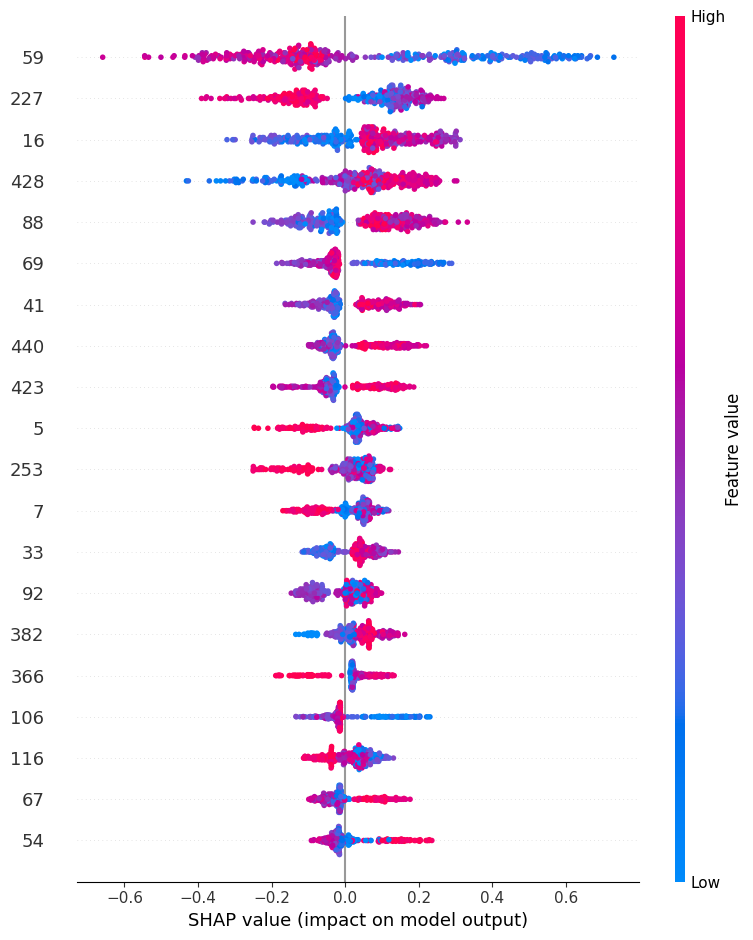

In [143]:
shap.summary_plot(shap_values, X_train)

In [144]:
shap_importances = np.abs(shap_values.values).mean(axis=0)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': shap_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [145]:
top_features = feature_importance_df.iloc[:30]['Feature'].tolist()
X_train_selected = X_train_resampled[top_features]
X_test_selected = X_test[top_features]

In [146]:
clf_selected.fit(X_train_selected, y_class_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [147]:
df_contaminated = df[df['is_contaminated'] == 1]
X_reg = df_contaminated[top_features]
y_reg = df_contaminated['log_vomitoxin']

In [148]:
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

In [149]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

In [150]:
reg_xgb_selected = XGBRegressor(
    colsample_bytree=0.7,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=500,
    subsample=0.7,
    random_state=42
)
reg_xgb_selected.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [151]:
y_class_pred = clf_selected.predict(X_test_selected)


In [152]:
y_pred_final = np.zeros_like(y_class_pred, dtype=float)


In [153]:
contaminated_indices = np.where(y_class_pred == 1)[0]

In [154]:
if len(contaminated_indices) > 0:
    X_test_reg_selected = scaler.transform(X_test_selected.iloc[contaminated_indices])
    y_reg_pred_log = reg_xgb_selected.predict(X_test_reg_selected)
    y_pred_final[contaminated_indices] = np.expm1(y_reg_pred_log)  

y_true = df.loc[X_test.index, "vomitoxin_ppb"]

rmse = mean_squared_error(y_true, y_pred_final, squared=False)
r2 = r2_score(y_true, y_pred_final)

print(f"Optimized Model with SHAP & ADASYN 🔹")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Optimized Model with SHAP & ADASYN 🔹
RMSE: 1488.8562
R² Score: 0.8265
